# Ocean Temperature and Surface Wind Speed

/g/data/fs38/publications/CMIP6/CMIP/CSIRO/ACCESS-ESM1-5/historical/r10i1p1f1/Omon/thetao/gn/latest/thetao_Omon_ACCESS-ESM1-5_historical_r10i1p1f1_gn_185001-185912.nc
/g/data/fs38/publications/CMIP6/CMIP/CSIRO/ACCESS-ESM1-5/historical/r10i1p1f1/Omon/thetao/gn/latest/thetao_Omon_ACCESS-ESM1-5_historical_r10i1p1f1_gn_201001-201412.nc
/g/data/fs38/publications/CMIP6/CMIP/CSIRO/ACCESS-ESM1-5/historical/r10i1p1f1/Amon/vas/gn/latest/vas_Amon_ACCESS-ESM1-5_historical_r10i1p1f1_gn_185001-201412.nc
/g/data/fs38/publications/CMIP6/CMIP/CSIRO/ACCESS-ESM1-5/historical/r10i1p1f1/Amon/uas/gn/latest/uas_Amon_ACCESS-ESM1-5_historical_r10i1p1f1_gn_185001-201412.nc

In [1]:
import accessvis
import numpy as np
from tqdm.notebook import tqdm
import xarray as xr
import pandas as pd


In [2]:
thetao=xr.open_dataset("/home/max/PycharmProjects/local_vis/ACCESS-Visualisation-Recipes/datasets/thetao_Omon_ACCESS-ESM1-5_historical_r10i1p1f1_gn_201001-201412.nc")
uas=xr.open_dataset("/home/max/PycharmProjects/local_vis/ACCESS-Visualisation-Recipes/datasets/uas_Amon_ACCESS-ESM1-5_historical_r10i1p1f1_gn_185001-201412.nc")
vas=xr.open_dataset("/home/max/PycharmProjects/local_vis/ACCESS-Visualisation-Recipes/datasets/vas_Amon_ACCESS-ESM1-5_historical_r10i1p1f1_gn_185001-201412.nc")


In [3]:
lv = accessvis.plot_earth()

lv.translation(0.0, -2.647, -19.062)
lv.rotation(-104.409, 46.607, -142.165)


In [4]:
def nearest_lat_lon( lat, lon):
    # Extract the latitude and longitude DataArrays
    lats = thetao.latitude
    lons = thetao.longitude

    # Compute squared distance (Haversine optional for geographic accuracy)
    delta = np.sqrt((lats - lat)**2 + (lons - lon)**2)

    # Find the indices of the minimum distance
    min_idx = delta.argmin(dim=["i", "j"])
    i = min_idx["i"].to_numpy()
    j = min_idx["j"].to_numpy()
    return {
        "i": i,
        "j": j,
        # "lat": u.latitude.sel(i=i,j=j).to_numpy(),
        # "lon": u.longitude.sel(i=i,j=j).to_numpy(),
    }
print(nearest_lat_lon(0, 115)) # start
print(nearest_lat_lon(0, 290)) # end

{'i': array(34), 'j': array(136)}
{'i': array(209), 'j': array(136)}


In [5]:
# adding vectors
time = thetao.time.to_numpy()[-1]
lat = 0
start_lon = 190
end_lon = 290
num_arrows=10
start_i = int(nearest_lat_lon(lat, start_lon)['i'])
end_i = int(nearest_lat_lon(lat, end_lon)['i'])
j = int(nearest_lat_lon(lat, start_lon)['j'])

vector_coords = [{
    'time':time, 
    'lat':lat,
    'lon':lon,
} for lon in np.linspace(start_lon, end_lon, num_arrows)]

accessvis.plot_vectors_xr(lv, vector_coords, u=uas['uas'], v=vas['vas'])


<LavaVuPython.DrawingObject; proxy of <Swig Object of type 'DrawingObject *' at 0x73f55b4fc6c0> >

In [6]:
raw_temp = thetao.sel(time=time, j=j, i=slice(start_i, end_i))['thetao'].to_numpy().T
colours = accessvis.array_to_rgba(raw_temp)
cross_section = accessvis.plot_cross_section(lv, colours, start = (start_lon, lat), end = (end_lon, lat))

In [7]:
lv.window((600,600))

In [8]:
lv.camera()

lv.translation(0.0, -2.647, -19.062)
lv.rotation(-104.409, 46.607, -142.165)


{'translate': [0.0, -2.647, -19.062],
 'rotate': [-0.006, 0.765, -0.431, 0.478],
 'xyzrotate': [-104.409, 46.607, -142.165],
 'fov': 45.0,
 'focus': [-0.015, -0.021, 0.001]}

In [9]:
lv.title(f'Wind speed and ocean temperature', fontsize=100)
wid = accessvis.CalendarWidget(lv=lv, text_colour = 'white', scale=0.2, offset=(0,0))

Output #0, mp4, to 'temp-wind.mp4':
  Stream #0:0: Unknown: none


  0%|          | 0/60 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

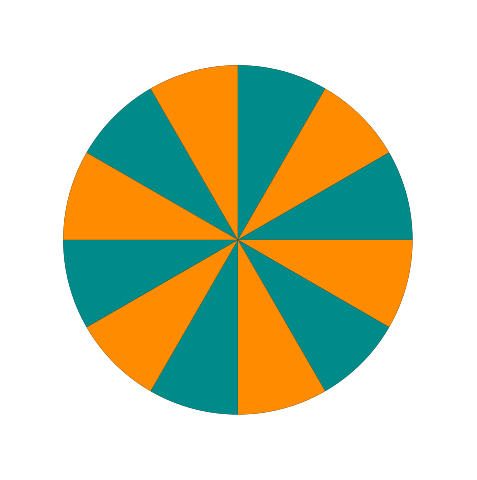

In [10]:
with lv.video(filename='temp-wind.mp4', quality=2, resolution=(600,600), width=600, height=600, fps=12) as v:
    for time in tqdm(thetao.time.values):
        wid.update_widget(date=pd.to_datetime(time).to_pydatetime())
        
        # Vectors
        vector_coords = [{
            'time':time,
            'lat':lat,
            'lon':lon,
        } for lon in np.linspace(start_lon, end_lon, num_arrows)]
        
        vec = accessvis.plot_vectors_xr(lv, vector_coords, u=uas['uas'], v=vas['vas'])

        # Cross Section
        raw_temp = thetao.sel(time=time, j=j, i=slice(start_i, end_i))['thetao'].to_numpy().T
        colours = accessvis.array_to_rgba(raw_temp)
        cross_section.texture(colours)
        lv.render()


In [12]:
str(pd.to_datetime(time).to_pydatetime().year)

'2014'